<a href="https://colab.research.google.com/github/yogapatangga/MachineLearningTasks/blob/main/1stWeekTasks/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbour
## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Social Network Ads dataset and display the first few rows

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


## Assuming the last column is the target label and the rest are features

In [ ]:
X = dataset.iloc[:, :-1].values  # Features
y = dataset.iloc[:, -1].values   # Target

## Splitting the dataset into the Training set and Test set (70:30)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create the KNN classifier and fit the model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicting the Test set results

In [11]:
y_pred = knn.predict(X_test)

## Making the Confusion Matrix and print the classification report

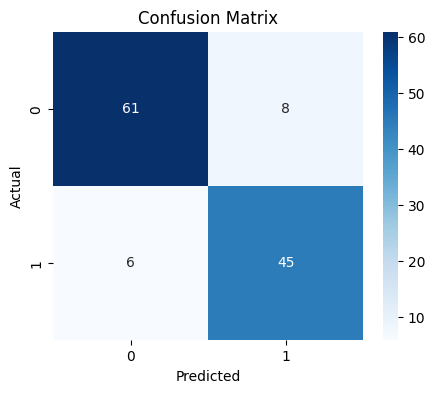

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        69
           1       0.85      0.88      0.87        51

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120


Accuracy: 88.33%


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = np.mean(y_pred == y_test)
print(f"\nAccuracy: {accuracy * 100:.2f}%")